In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [202]:
data = pd.read_excel('ICUfinal.xlsx', engine="openpyxl", index_col=0)

In [203]:
data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,"Motor Neurone Disease, Smoker",0
1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,"Motor Neurone Disease, Smoker",0
2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,"Motor Neurone Disease, Smoker",0
3,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,"Motor Neurone Disease, Smoker",0
4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,"Motor Neurone Disease, Smoker",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,NaN,0
1921,384,0,50th,1,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,NaN,0
1922,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,NaN,0
1923,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,NaN,0


array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

<br><p style="font-size:40px; text-align: right;" ><b>EDA</b></p>

<br><p style="font-size:30px; text-align: right;" >disease analysis and categorizing tags</p>

In [205]:
diseases = []
for x in data["tags"]:
    if isinstance(x, str):
        diseases.extend(x.split(", "))
diseases = list(set(diseases))
print(diseases)

['heart disease', 'asthma', 'Motor Neurone Disease', 'Smoker', 'Kidney disease', 'Lung cancer']


In [206]:
def count_diseases(df):
    disease_count = {}
    for i, row in df.iterrows():
        if isinstance(row["tags"], str):
            for disease in diseases:
                if disease in row["tags"]:
                    disease_count[disease] = disease_count.get(disease, 0) + 1
    disease_count["no illness"] =  len(df.index) - sum(disease_count.values())
    return disease_count

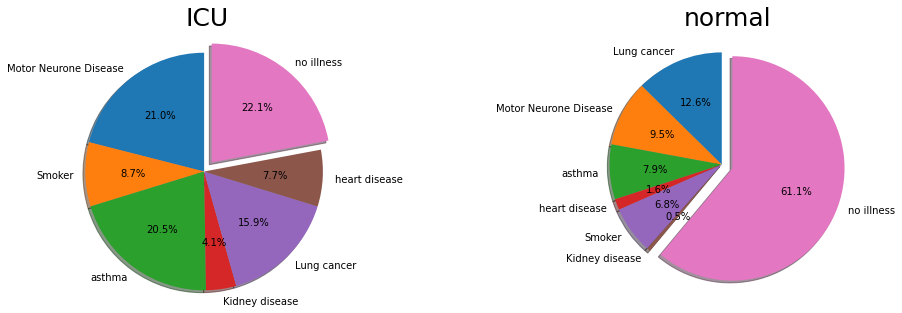

In [207]:
# check which of them are more common in ICU patients. give numbers to them based on that

ICU_patients = data.query('ICU == 1 and WINDOW == "ABOVE_12"')
disease_count = count_diseases(ICU_patients)
fig, ax = plt.subplots(1, 2)
ax[0].pie(disease_count.values(), explode=[0] * (len(disease_count) - 1) + [0.1] , labels=disease_count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].set_title('ICU', fontsize=25, fontname="DejaVu Sans")
ax[0].axis('equal') 

Healthy_patients = data.query('ICU == 0 and WINDOW == "ABOVE_12"')
disease_count = count_diseases(Healthy_patients)
ax[1].pie(disease_count.values(), explode=[0] * (len(disease_count) - 1) + [0.1] , labels=disease_count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('normal', fontsize=25, fontname="DejaVu Sans")
ax[1].axis('equal')
fig.set_size_inches(14, 5)
fig.subplots_adjust(wspace=1)
plt.show()

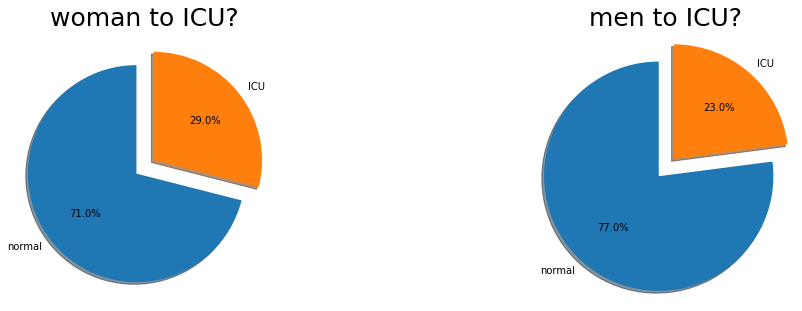

In [210]:
women_to_ICU = [data.query('ICU == 0 and GENDER == 0').shape[0], data.query('ICU == 1 and GENDER == 0').shape[0]]
men_to_ICU = [data.query('ICU == 0 and GENDER == 1').shape[0], data.query('ICU == 1 and GENDER == 1').shape[0]]

fig, ax = plt.subplots(1, 2)
ax[0].pie(women_to_ICU, explode=[0.1, 0.1] , labels=["normal", "ICU"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].set_title('woman to ICU?', fontsize=25, fontname="DejaVu Sans")
ax[0].axis('equal')      
ax[1].pie(men_to_ICU, explode=[0.1, 0.1] , labels=["normal", "ICU"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('men to ICU?', fontsize=25, fontname="DejaVu Sans")
ax[1].axis('equal')
fig.set_size_inches(14, 5)
fig.subplots_adjust(wspace=1)
plt.show()

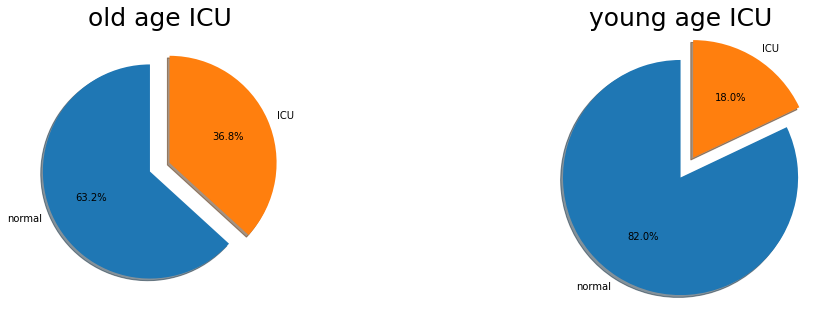

In [209]:
old_age_ICU = [data.query('ICU == 0 and AGE_ABOVE65 == 1').shape[0], data.query('ICU == 1 and AGE_ABOVE65 == 1').shape[0]]
young_age_ICU = [data.query('ICU == 0 and AGE_ABOVE65 == 0').shape[0], data.query('ICU == 1 and AGE_ABOVE65 == 0').shape[0]]

fig, ax = plt.subplots(1, 2)
ax[0].pie(old_age_ICU, explode=[0.1, 0.1] , labels=["normal", "ICU"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].set_title('old age ICU', fontsize=25, fontname="DejaVu Sans")
ax[0].axis('equal')      
ax[1].pie(young_age_ICU, explode=[0.1, 0.1] , labels=["normal", "ICU"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('young age ICU', fontsize=25, fontname="DejaVu Sans")
ax[1].axis('equal')
fig.set_size_inches(14, 5)
fig.subplots_adjust(wspace=1)
plt.show()

In [177]:
# remove columns with so much na values
# n = 0
# na_ration = []
columns_fullof_na = []
for colname in data.columns:
#     na_ration.append(data[colname].isna().sum() / data.shape[0])
    
    if data[colname].isna().sum() / data.shape[0] > 0.50:
        columns_fullof_na.append(colname)
#         print(colname)
#         n+=1


In [280]:
# fill nas with mean
data = data.fillna(value=data.mean(skipna = True))

In [281]:
not_correlated_columns = (data.corr()["ICU"][abs(data.corr()["ICU"])  < 0.05 ])

not_correlated_columns
# data.loc[:, list(not_correlated_columns.keys())]

PATIENT_VISIT_IDENTIFIER   -0.047547
IMMUNOCOMPROMISED           0.014351
OTHER                      -0.048202
BILLIRUBIN_MEDIAN           0.020112
BILLIRUBIN_MEAN             0.020112
BILLIRUBIN_MIN              0.020112
BILLIRUBIN_MAX              0.020112
BLAST_MEDIAN                0.013059
BLAST_MEAN                  0.013059
BLAST_MIN                   0.013059
BLAST_MAX                   0.013059
GLUCOSE_MEDIAN             -0.008443
GLUCOSE_MEAN               -0.008443
GLUCOSE_MIN                -0.008443
GLUCOSE_MAX                -0.008443
LINFOCITOS_MEDIAN           0.044473
LINFOCITOS_MEAN             0.044473
LINFOCITOS_MIN              0.044473
LINFOCITOS_MAX              0.044473
P02_ARTERIAL_MEDIAN        -0.019454
P02_ARTERIAL_MEAN          -0.019454
P02_ARTERIAL_MIN           -0.019454
P02_ARTERIAL_MAX           -0.019454
PC02_ARTERIAL_MEDIAN        0.034478
PC02_ARTERIAL_MEAN          0.034478
PC02_ARTERIAL_MIN           0.034478
PC02_ARTERIAL_MAX           0.034478
P

In [296]:
correlated_cols = abs(data.corr()) > 0.95
correlated_columns = []
cols = correlated_cols.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if correlated_cols.loc[cols[i], cols[j]]:
            correlated_columns.append((cols[i], cols[j]))


<br><p style="font-size:40px; text-align: right;" ><b>Feature Engineering</b></p>

<br><p style="font-size:24px; text-align: right;" >در ابتدا ستون های غیر عددی را به ستون های عددی تبدیل میکنیم</p>

In [35]:
data.select_dtypes('object')

,AGE_PERCENTIL,WINDOW,tags
0,60th,0-2,"Motor Neurone Disease, Smoker"
1,60th,2-4,"Motor Neurone Disease, Smoker"
2,60th,4-6,"Motor Neurone Disease, Smoker"
3,60th,6-12,"Motor Neurone Disease, Smoker"
4,60th,ABOVE_12,"Motor Neurone Disease, Smoker"
...,...,...,...
1920,50th,0-2,NaN
1921,50th,2-4,NaN
1922,50th,4-6,NaN
1923,50th,6-12,NaN


as we see most deadly diseases are 'motor neurone disease', 'asthma' and 'lung cancer' at first place.<br>
smoke and heart disease at second place and Kidney disease at third place.<br>
we give numbers to each of them as bellow <br>
motor, asthma or lung caner --> 3<br>
smoke or heart disease --> 2<br>
kidney disease --> 1<br>
no disease --> 0

In [36]:
data["tags"] = data["tags"].apply(lambda x: 0 if not isinstance(x, str) else (3 if any(disease in x.split(', ') for disease 
                                  in ['Motor Neurone Disease', 'Lung cancer', 'asthma']) else (2 if any(disease in x.split(', ') for disease 
                                  in ['Smoker', 'heart disease']) else  1)))
data["tags"]

0       3
1       3
2       3
3       3
4       3
       ..
1920    0
1921    0
1922    0
1923    0
1924    3
Name: tags, Length: 1925, dtype: int64

In [37]:
# data["OXYGEN_SATURATION_DIFF"].value_counts()
# data["AGE_PERCENTIL"].unique()
data["AGE_PERCENTIL"] = data["AGE_PERCENTIL"].apply(lambda x: 10 if "Above" in x else int(x[0]))
data["AGE_PERCENTIL"].value_counts()

2     215
1     205
3     205
4     200
7     195
5     190
8     190
6     185
10    185
9     155
Name: AGE_PERCENTIL, dtype: int64

In [38]:
data["WINDOW"] = data["WINDOW"].apply(lambda x: 5 if "ABOVE" in x else int(int(x[0])/2 + 1))
data["WINDOW"].value_counts()

1    385
2    385
3    385
4    385
5    385
Name: WINDOW, dtype: int64

In [183]:
data2 = data.drop(columns_fullof_na, axis=1)


In [212]:
# d.drop(not_correlated_columns, axis=1)
# all not correlated columns is subset of fullof na
data3 = data.drop(not_correlated_columns, axis=1)
data3

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,1,60th,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,"Motor Neurone Disease, Smoker",0
1,1,60th,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,"Motor Neurone Disease, Smoker",0
2,1,60th,0,0.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,"Motor Neurone Disease, Smoker",0
3,1,60th,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,"Motor Neurone Disease, Smoker",0
4,1,60th,0,0.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,"Motor Neurone Disease, Smoker",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0,50th,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,NaN,0
1921,0,50th,1,0.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,NaN,0
1922,0,50th,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,NaN,0
1923,0,50th,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,NaN,0
